# Does Momentum Exist in Small Cap Fundamentals?
### Author: Gerardo Salazar
#### Date: 2017-??-??
We believe that companies with good performance in the past with their fundamentals will continue to do well, and those that don't will continue to falter. 

In [54]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import alphalens
import pyfolio

from quantopian.research import run_pipeline, symbols, get_pricing
from quantopian.pipeline import CustomFactor, Pipeline
from quantopian.pipeline.data import quandl, sentdex, psychsignal, Fundamentals
from quantopian.interactive import data as interactive

In [76]:
def make_smallcap_pipeline():
    return Pipeline(
        columns={
            'fcf': Fundamentals.free_cash_flow.latest.zscore() * Fundamentals.revenue_growth.latest.zscore()
        },
        screen=Fundamentals.market_cap.latest < 50000000
    )

In [77]:
data = run_pipeline(make_smallcap_pipeline(), start_date='2006-01-01', end_date='2018-01-01')

In [78]:
factor_data = data.copy()

In [80]:
pricing_data = get_pricing(factor_data.index.levels[1].unique(), start_date='2006-01-01', end_date='2018-01-01', fields='close_price')

In [83]:
ffw = alphalens.utils.get_clean_factor_and_forward_returns(
    factor_data.mul(-1),
    pricing_data,
    periods=(30, int(365.25/3.85)),
    quantiles=5
)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-4.099974,0.000011,-0.022957,0.052035,256710,20.090030
2,-0.040112,0.000498,-0.011252,0.004999,254998,19.956049
3,-0.020437,0.000673,-0.007834,0.003241,254954,19.952606
4,-0.013053,0.007175,-0.004443,0.002578,255003,19.956441
5,-0.006983,9.850700,0.056781,0.270684,256133,20.044874


Returns Analysis


,30,94
Ann. alpha,0.130,0.162
beta,-0.287,0.050
Mean Period Wise Return Top Quantile (bps),-47.207,-31.210
Mean Period Wise Return Bottom Quantile (bps),328.081,234.152
Mean Period Wise Spread (bps),-7.517,-1.088


Information Analysis


,30,94
IC Mean,0.032,0.027
IC Std.,0.056,0.065
t-stat(IC),31.287,21.905
p-value(IC),0.000,0.000
IC Skew,0.034,-0.190
IC Kurtosis,-0.360,0.355
Ann. IR,9.182,6.428


Turnover Analysis


,30,94
Quantile 1 Mean Turnover,0.389,0.685
Quantile 2 Mean Turnover,0.475,0.773
Quantile 3 Mean Turnover,0.453,0.719
Quantile 4 Mean Turnover,0.472,0.759
Quantile 5 Mean Turnover,0.408,0.705


,30,94
Mean Factor Rank Autocorrelation,0.643,0.241


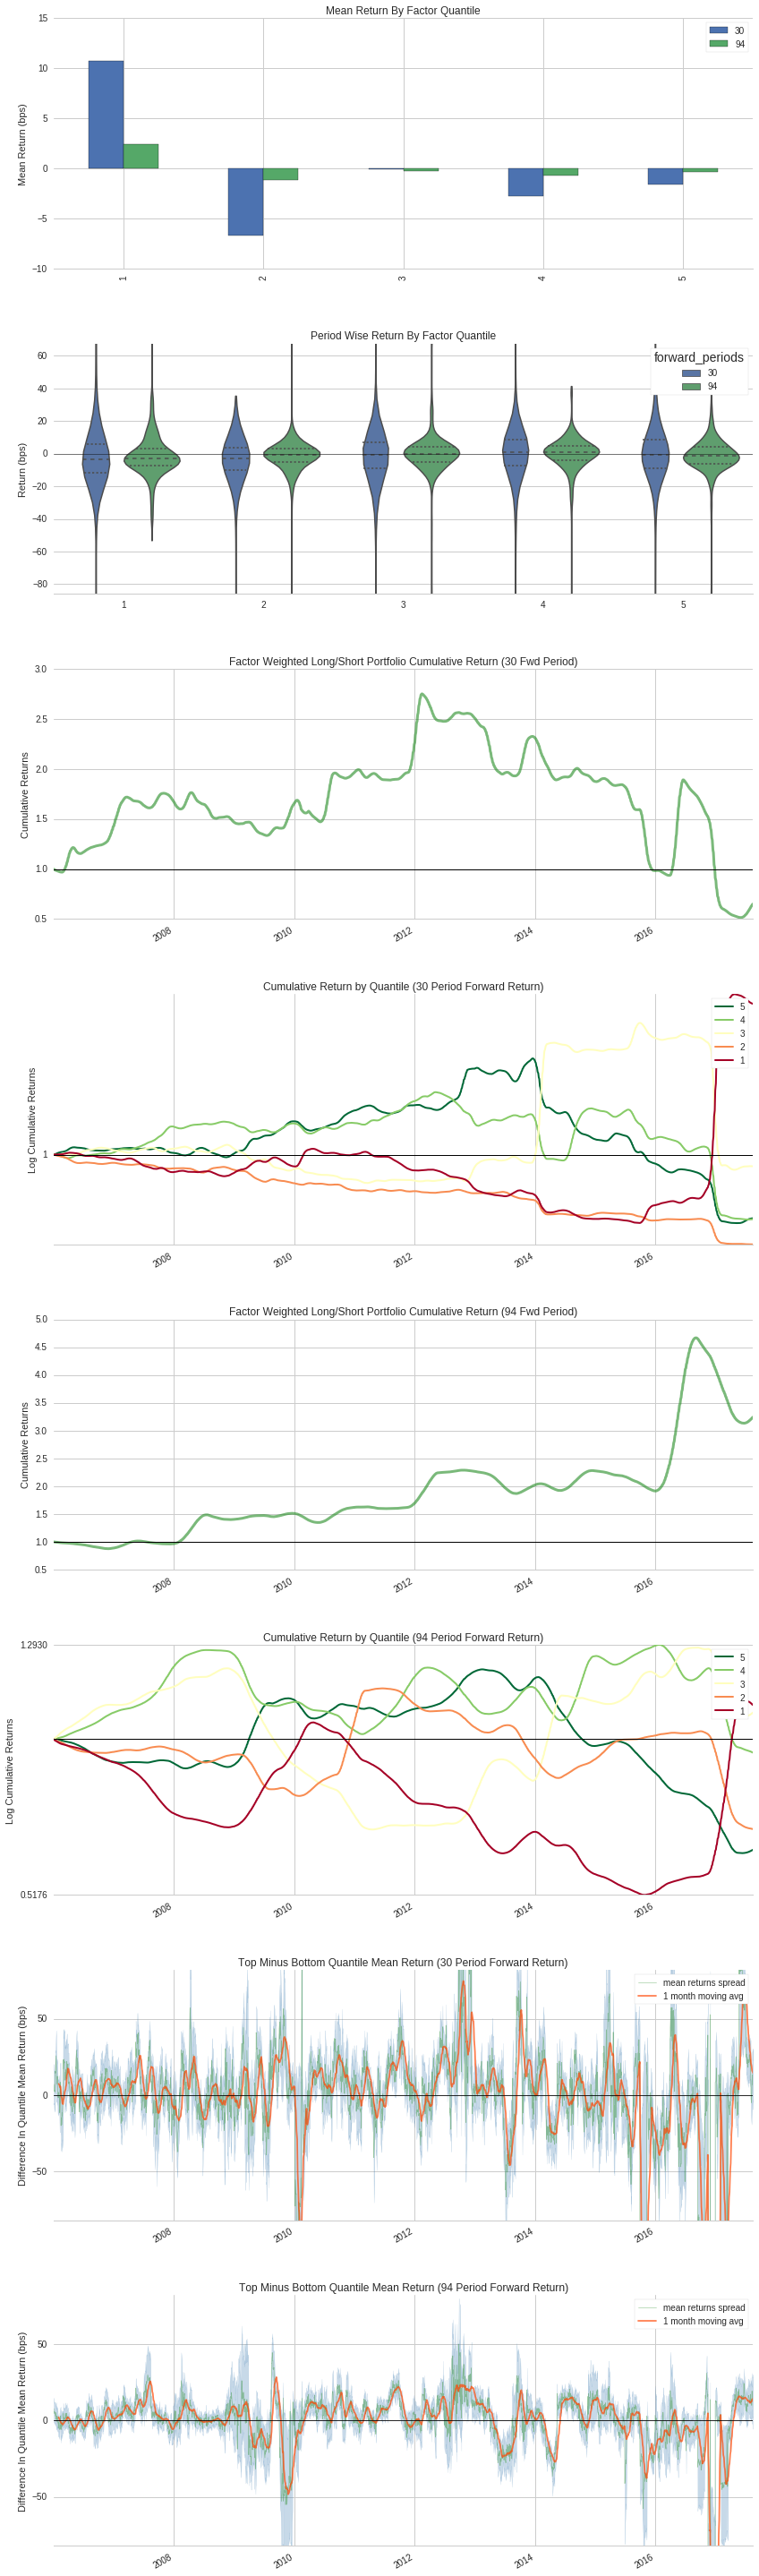

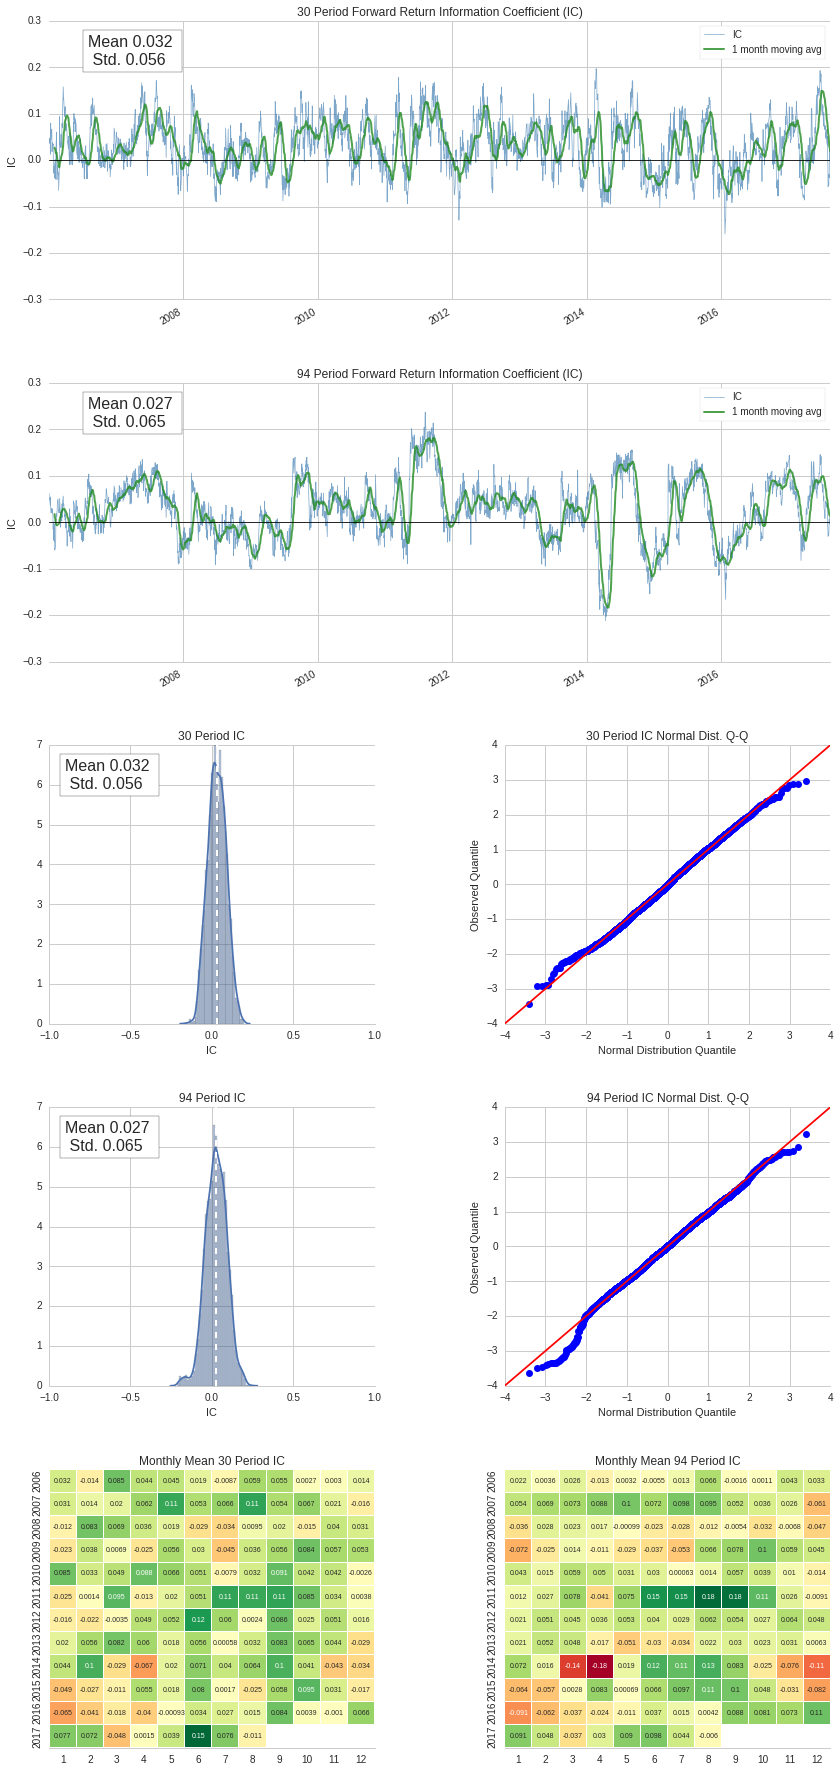

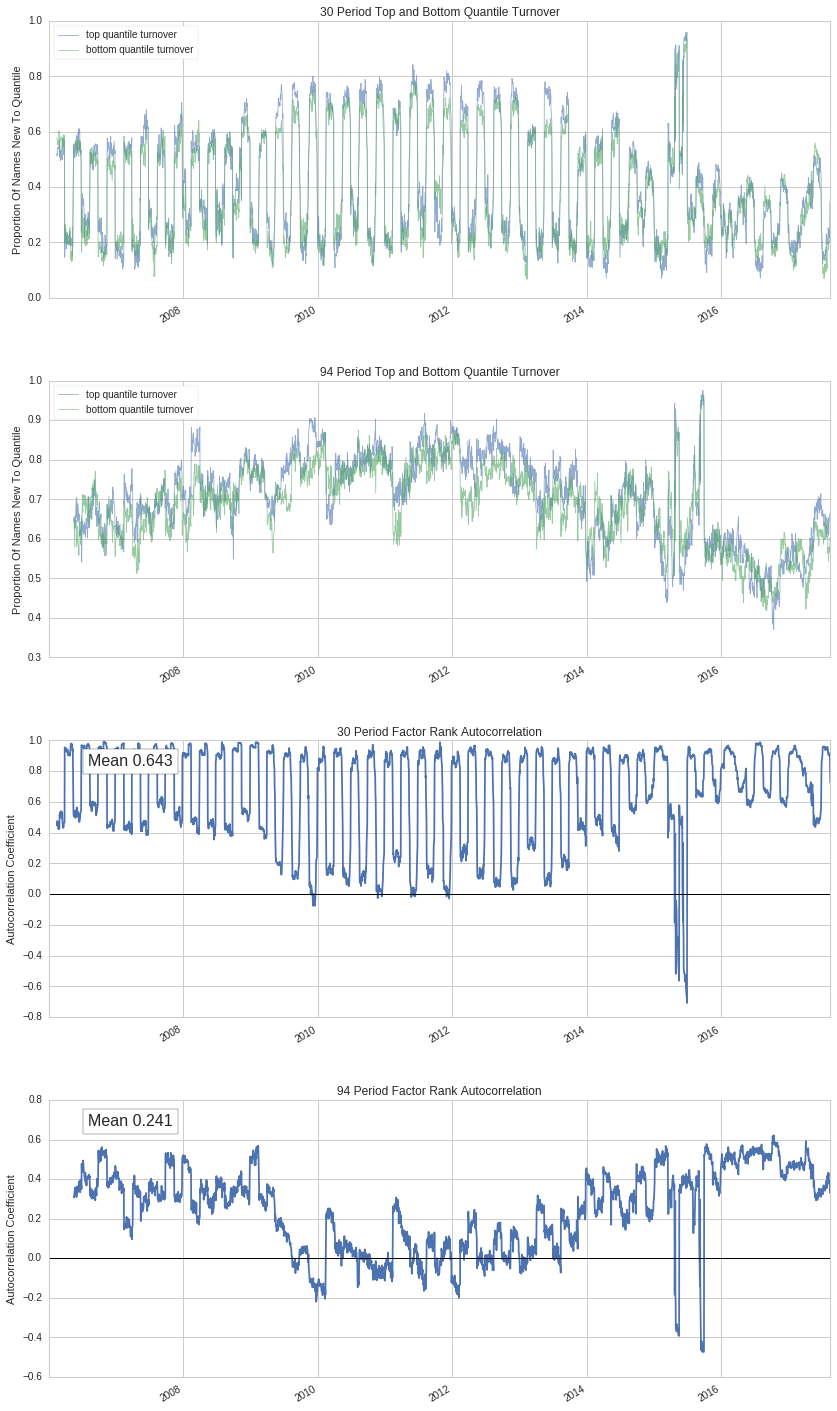

In [84]:
alphalens.tears.create_full_tear_sheet(ffw)